In [13]:
#3/18(수) 신경망(가중치 업데이트 등)
#ANN(인공신경망)에서 히든레이어 두개 이상 -> 딥러닝(DNN)
#DNN - CNN
#    - RNN

In [1]:
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
faces.data.shape#(400,4096)
range(len(faces.data))
klist=np.random.choice(range(len(faces.data)),10)

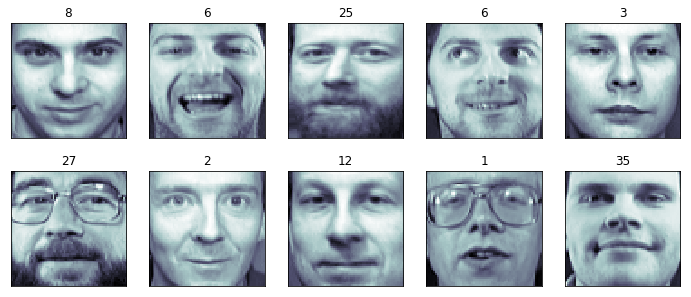

In [4]:
#2줄 5칸 나누어 얼굴 이미지(klist) 출력
fig=plt.figure(figsize=(12,5))
for i in range(2):
    for j in range(5):
        k=klist[i*5+j]
        ax=fig.add_subplot(2, 5, i*5+j+1)
        ax.imshow(faces.images[k],cmap=plt.cm.bone)
        plt.title(faces.target[k])
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(faces.data, faces.target,test_size=0.4,random_state=0)

In [6]:
from sklearn.svm import SVC
model=SVC(kernel='linear').fit(xtrain,ytrain)

In [9]:
# faces.target#400개의 사진에 대한 label[0,0,...,39,39]
# faces.images.shape#(400,64,64)
# faces.data.shape#(400,4096)

(400, 4096)

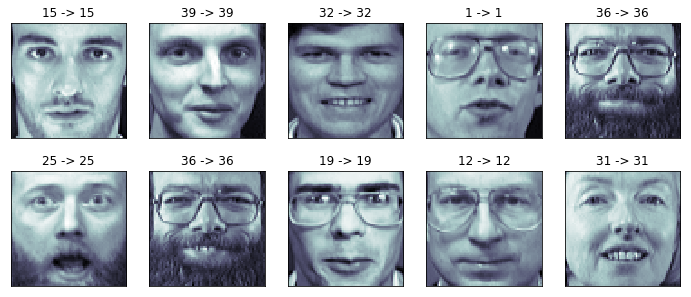

In [12]:
#2줄 5칸 나누어 얼굴 이미지(klist) 출력
fig=plt.figure(figsize=(12,5))
klist=np.random.choice(range(len(ytest)),10)
for i in range(2):
    for j in range(5):
        k=klist[i*5+j]
        ax=fig.add_subplot(2, 5, i*5+j+1)
        ax.imshow(xtest[k:(k+1),:].reshape(64,64),cmap=plt.cm.bone)
        plt.title("%d -> %d" %(ytest[k],model.predict(xtest[k:(k+1),:])))
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])
plt.show()

In [15]:
from sklearn.metrics import classification_report, accuracy_score
#scikit-lear.org
ypredtrain=model.predict(xtrain)
ypredtest=model.predict(xtest)

In [17]:
print(classification_report(ytrain,ypredtrain))
len(ytrain)#240

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

240

In [18]:
print(classification_report(ytest,ypredtest))
len(ytest)#240

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    

160

In [19]:
# confusion matrix(분류 평가표):실제와 예측이 일치하는 개수
# 행-정답, 열-예측
from sklearn.metrics import confusion_matrix
xtrue=[2,0,2,2,0,1]#정답
xpred=[0,0,2,2,0,2]#예측값
confusion_matrix(xtrue,xpred)
#행(정답), 열(예측)
#array([[2,0,0],   2: 정답이 0, 예측도 0
#       [0,0,1],   1: 정답이 1, 예측이 2
#       [1,0,2]],  1: 정답이 2, 예측은 0
#                  2: 정답이 2, 예측도 2

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [ ]:
#이진분류 (양성, 음성)
#실제 양성
#FDS (Fraud Detection System)사기인지 아닌지 예측 탐지 시스템
#TP(True Positive) 실제 양성 - 예측도 양성  사기를 사기로 예측
#FN(False Negatice) 실제 양성 - 예측은 음성  사기를 정상으로 예측
# TP  FN
# FP  TN

In [20]:
#양성:1, 음성:0
xtrue=[1,0,1,1,0,1]
xpred=[0,0,1,1,0,1]
confusion_matrix(xtrue,xpred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [21]:
confusion_matrix(xtrue,xpred,labels=[1,0])

array([[3, 1],
       [0, 2]], dtype=int64)

In [22]:
# 평가 점수 
#- Confusion-matix로부터 평가점수를 계산
#- 정확도, *정밀도, *f점수, *재현율, 위양성율
# *실무 많이 쓰임
# 1.정확도(accuracy) : 전체 샘플 중 맞게 예측한 샘플 비율
# accuracy = (TP + TN) / (TP + TN + FP + FN)
# 2.정밀도(Precision) : 양성클래스에 속한다고 출력한  샘플 중에서 
#                       실제로 양성클래스에 속하는 샘플 수의 비율
# -> 양성으로 예측한 전체 수 분에 예측및 실제 모두 양성
# Precision = TP / (TP + FP)
# ex) FDS, 정밀도: 사기거래라고 예측한 전체 샘플 중에서 실제 사기 비율
# 3.재현율(Recall) : 실제 양성인 샘플 중에서, 양성에 속한다고 예측을 한 비율
# ex) FDS, 재현율 = 실제 사기 거래중에서, 실제 사기 거래라고 예측한 비율
#       recall = TP / (TP + FN)
# 4. 위양성율(fallout) = FP / (FP + TN) => 낮을 수록 좋은 모델 
# -> 실제로는 암이 아닌데 암이라고 잘못 예측한 비율
# ex) FDS, 실제로는 정상거래인데 FDS가 사기라고 예측한 거래의 비율
# % 특이도 = 1 - fallout
# 5. F점수 F베타점수 베타가 1 이면 F1점수
# F베타 = (1+베타 제곱)(precision*recall) / (베타제곱precision+recall)
# F1 = 2*precision*recall / (precision + recall)
# => 조화 평균(precision 과 recall),
# F1(0에서 1사이) precision(0에서 1사이), recall(0에서 1사이)

In [24]:
xtrue=[0,0,0,1,1,0,0]
xpred=[0,0,0,0,1,1,1]
print(classification_report(xtrue, xpred))
"""
0이라고 예측한 데이터의 75%만 실제로 0이었음.
1이라고 예측한 데이터의 33%만 실제로 1이었음.
실제 0인 데이터 중의 60%만 0으로 판별됨.
실제 1인 데이터 중의 50%만 1로 판별됨.
"""

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7

